# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [16]:

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

from matplotlib import pyplot as plt

In [6]:
data = pd.read_excel( 'geo.xlsx', index_col=0)
data.head(10)

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1
5,37.558526,55.728758,-1
6,37.566431,55.731794,-1
7,37.558957,55.723399,-1
8,37.558957,55.723399,-1
9,37.565767,55.734567,-1


In [7]:
data2 = pd.read_excel( 'geo_comment.xlsx', index_col=0)
data2.head(10)

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...
5,37.558526,55.728758,-1,1,Установить зону развития по адресу: Новодевичи...
6,37.566431,55.731794,-1,1,Установить зону развития по адресу: Новодевичи...
7,37.558957,55.723399,-1,1,Прошу поменять зону сохранения нахождения объе...
8,37.558957,55.723399,-1,1,Прошу перевести из зоны сохранения в зону разв...
9,37.565767,55.734567,-1,1,Прошу внести технико-экономические показатели ...


In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

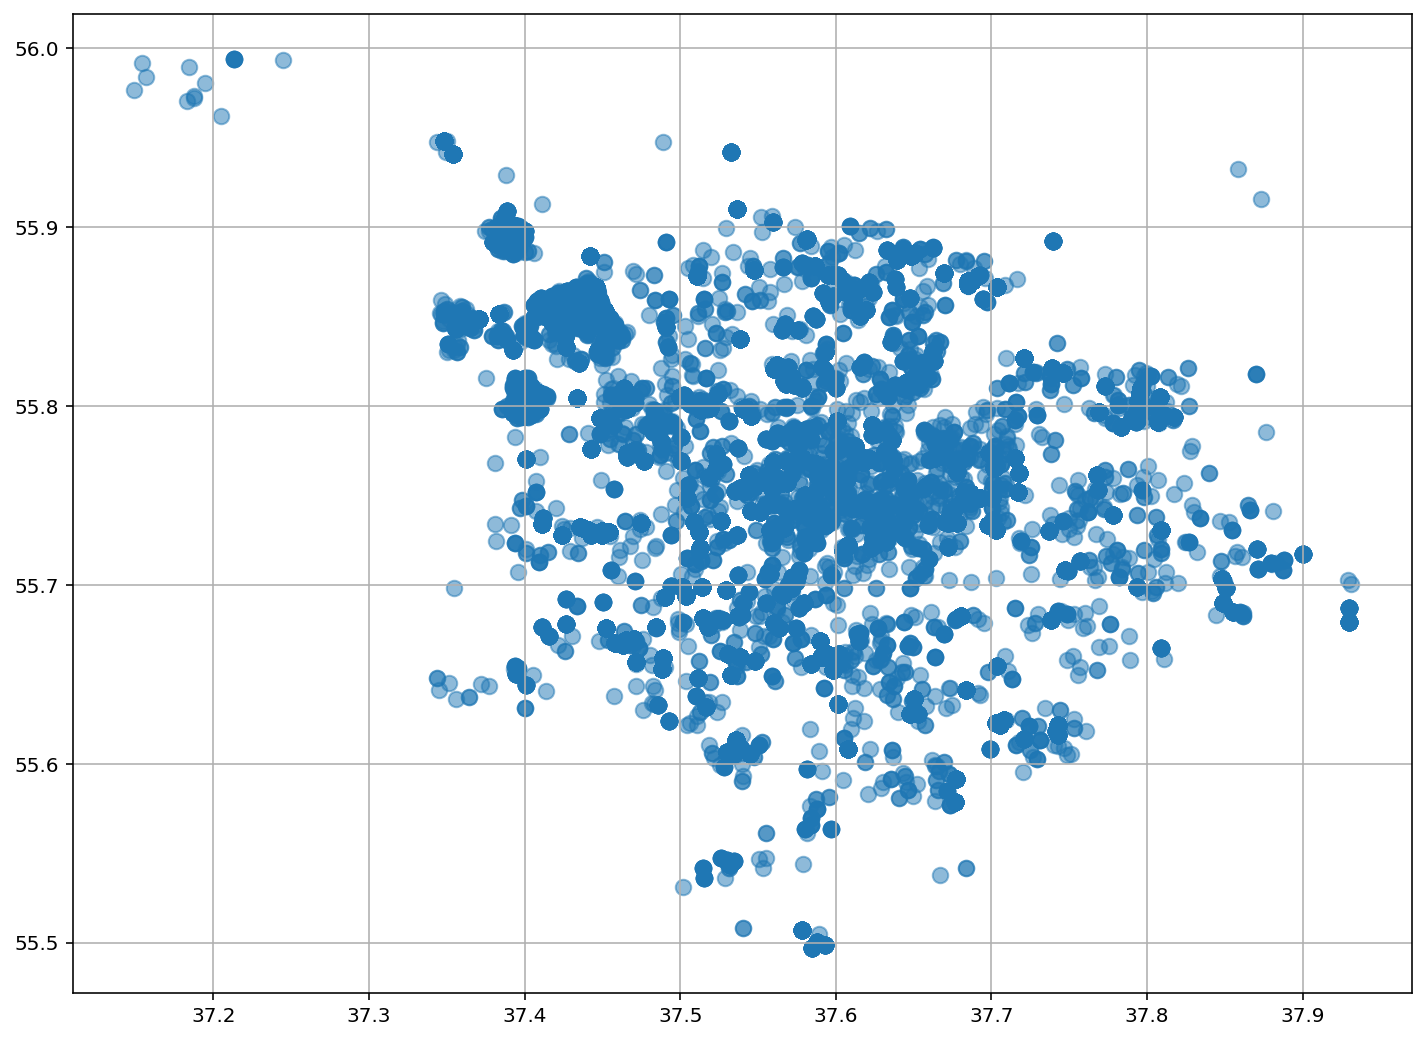

In [9]:
plt.scatter(data['x'],data['y'], s=60, alpha=0.5)
plt.grid()

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
X_scaled = scaler.fit_transform(data.loc[:,['x', 'y']])

In [17]:
model = KMeans()

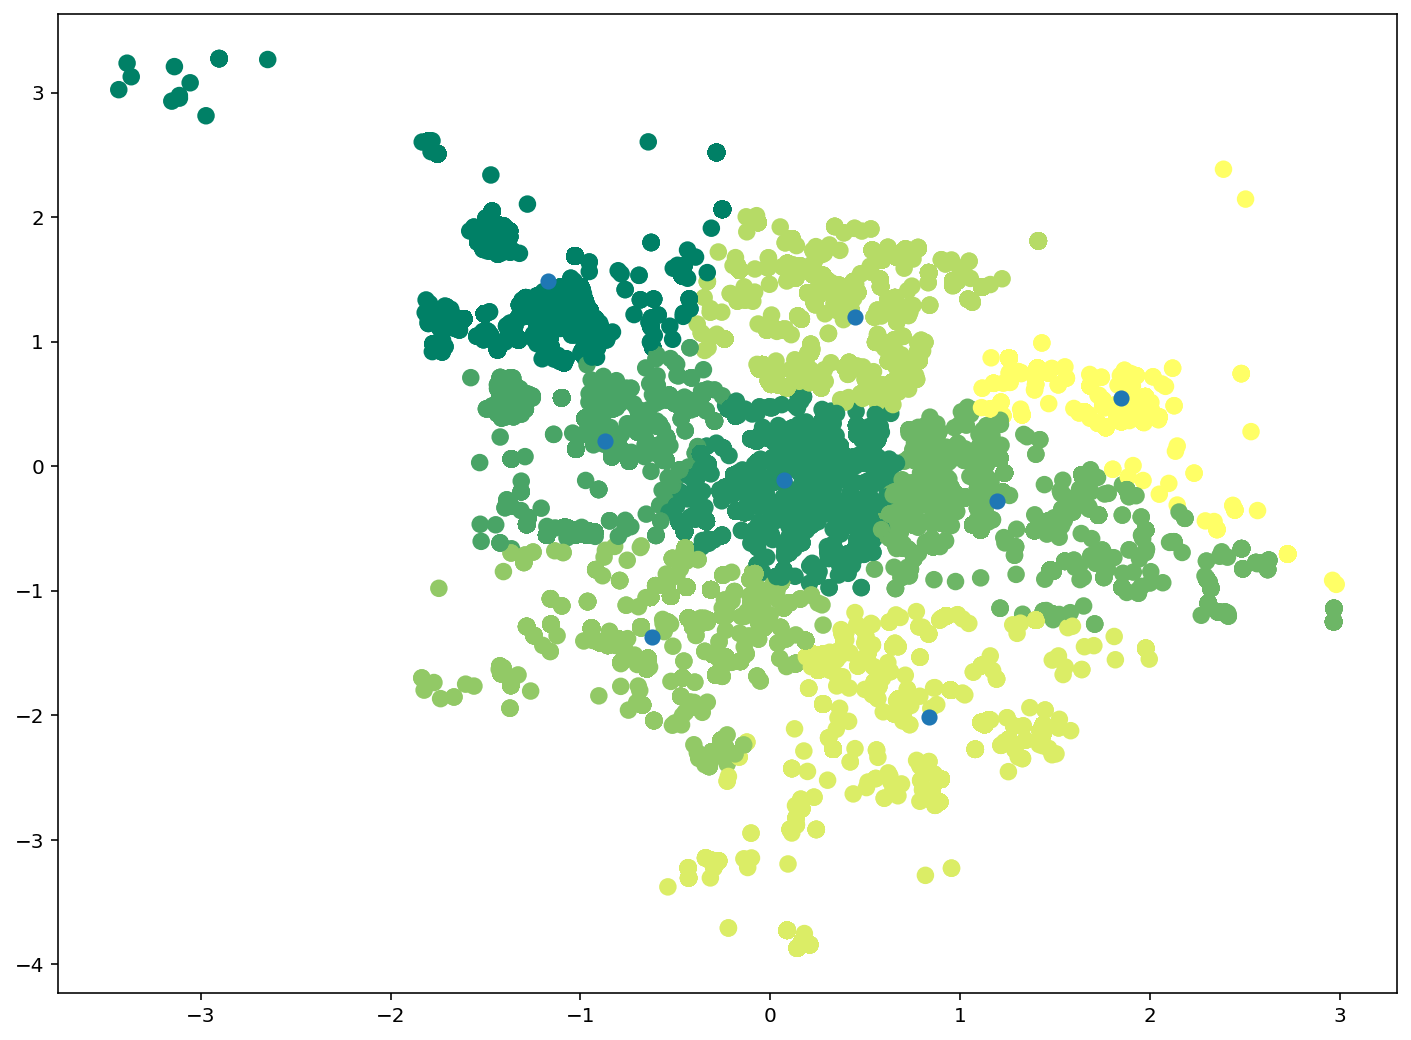

In [22]:
clusters = model.fit_predict(X_scaled)
centers = model.cluster_centers_
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='summer', s=60)
plt.scatter(centers[:, 0], centers[:, 1], s=50)

In [23]:
#подобрать оптимальное число кластеров 
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

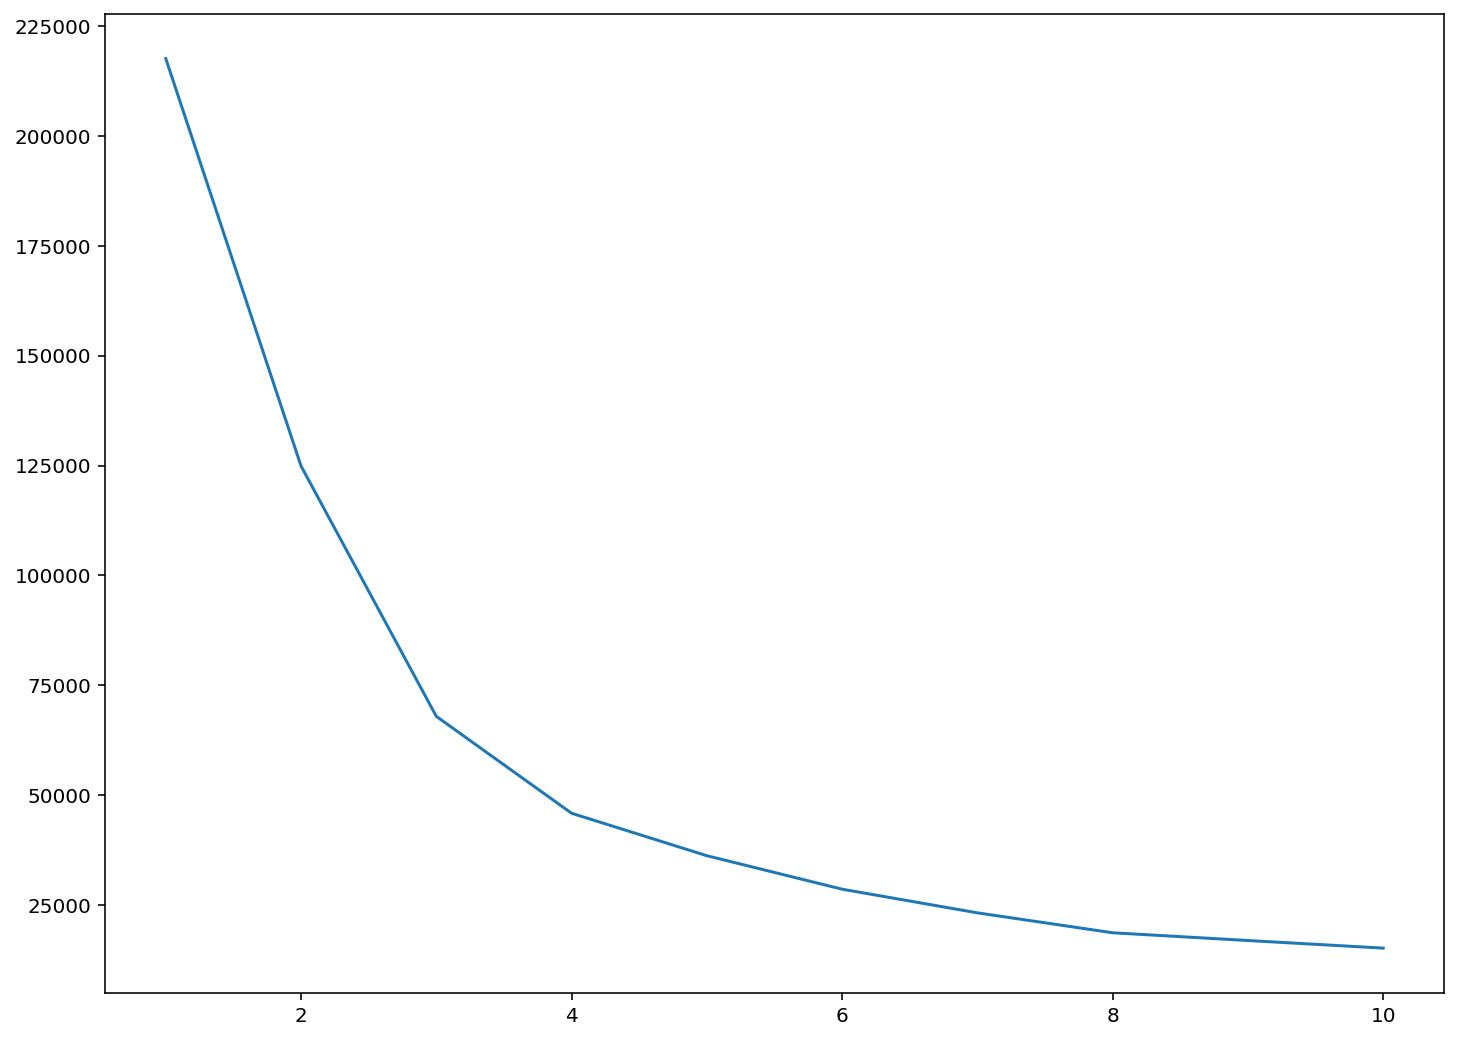

In [24]:
plt.plot(ks, k_inertia)

Оптимальное кол-во 4 или 5

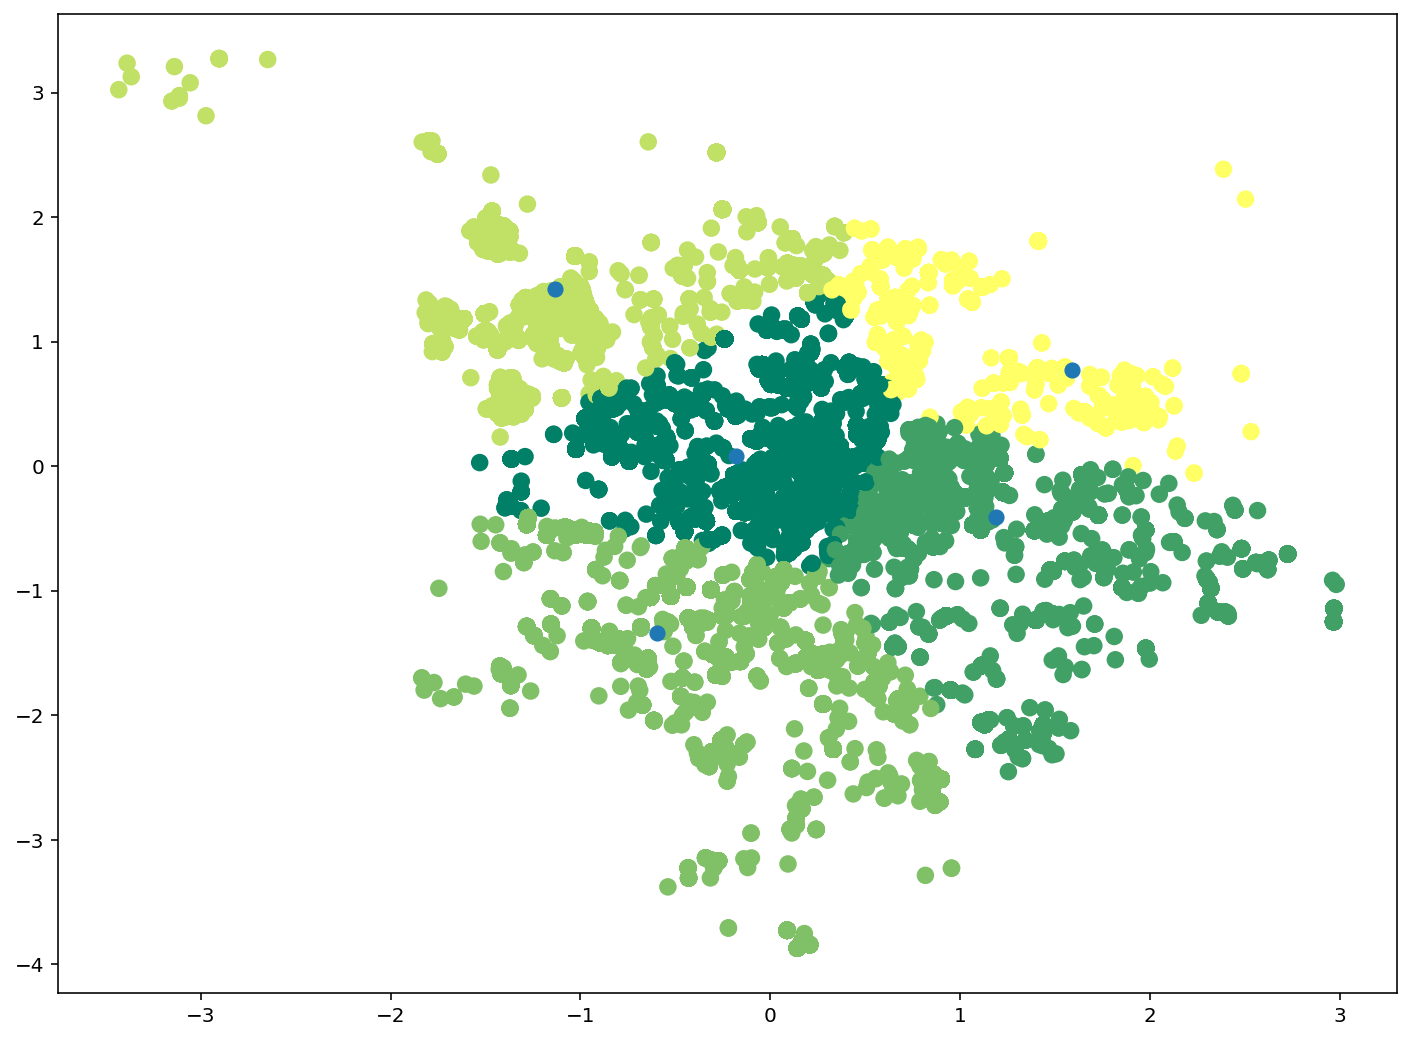

In [25]:
new_model = KMeans(n_clusters=5)
new_clusters = new_model.fit_predict(X_scaled)
new_centers = new_model.cluster_centers_
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=new_clusters, cmap='summer', s=60)
plt.scatter(new_centers[:, 0], new_centers[:, 1], s=50)

In [ ]:
# аналогично исследовать скопления голосов за и против отдельно

In [29]:
X_positive = data[data.comment_class == 1]
X_negative = data[data.comment_class == -1]
X_positive = scaler.fit_transform(X_positive)
X_negative = scaler.fit_transform(X_negative)

In [31]:
k_inertia_pos = []
k_inertia_neg = []
ks = range(1,11)

for k in ks:
    model = KMeans(n_clusters=k)
    clusters_kmeans = model.fit_predict(X_positive)
    k_inertia_pos.append(model.inertia_)
    clusters_kmeans = model.fit_predict(X_negative)
    k_inertia_neg.append(model.inertia_)

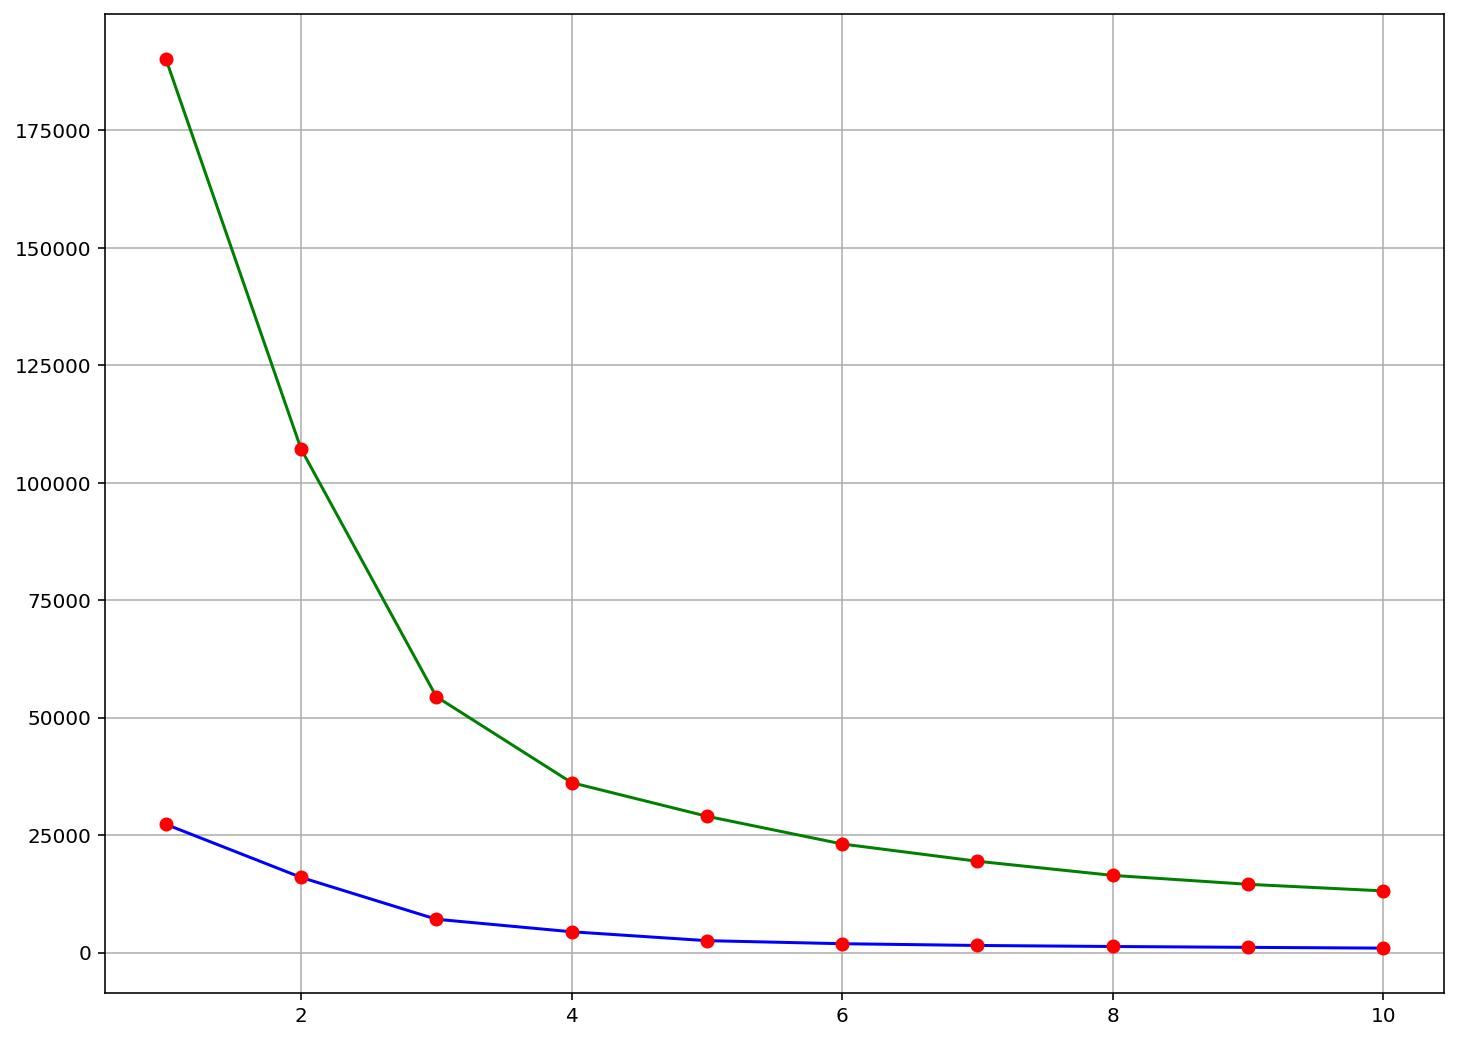

In [32]:
plt.plot(ks, k_inertia_pos, color = 'blue')
plt.plot(ks, k_inertia_pos ,'ro')
plt.plot(ks, k_inertia_neg, color = 'green')
plt.plot(ks, k_inertia_neg,'ro')
plt.grid()
plt.show()

Для позитивных 3 более оптимальное кол-во кластеров

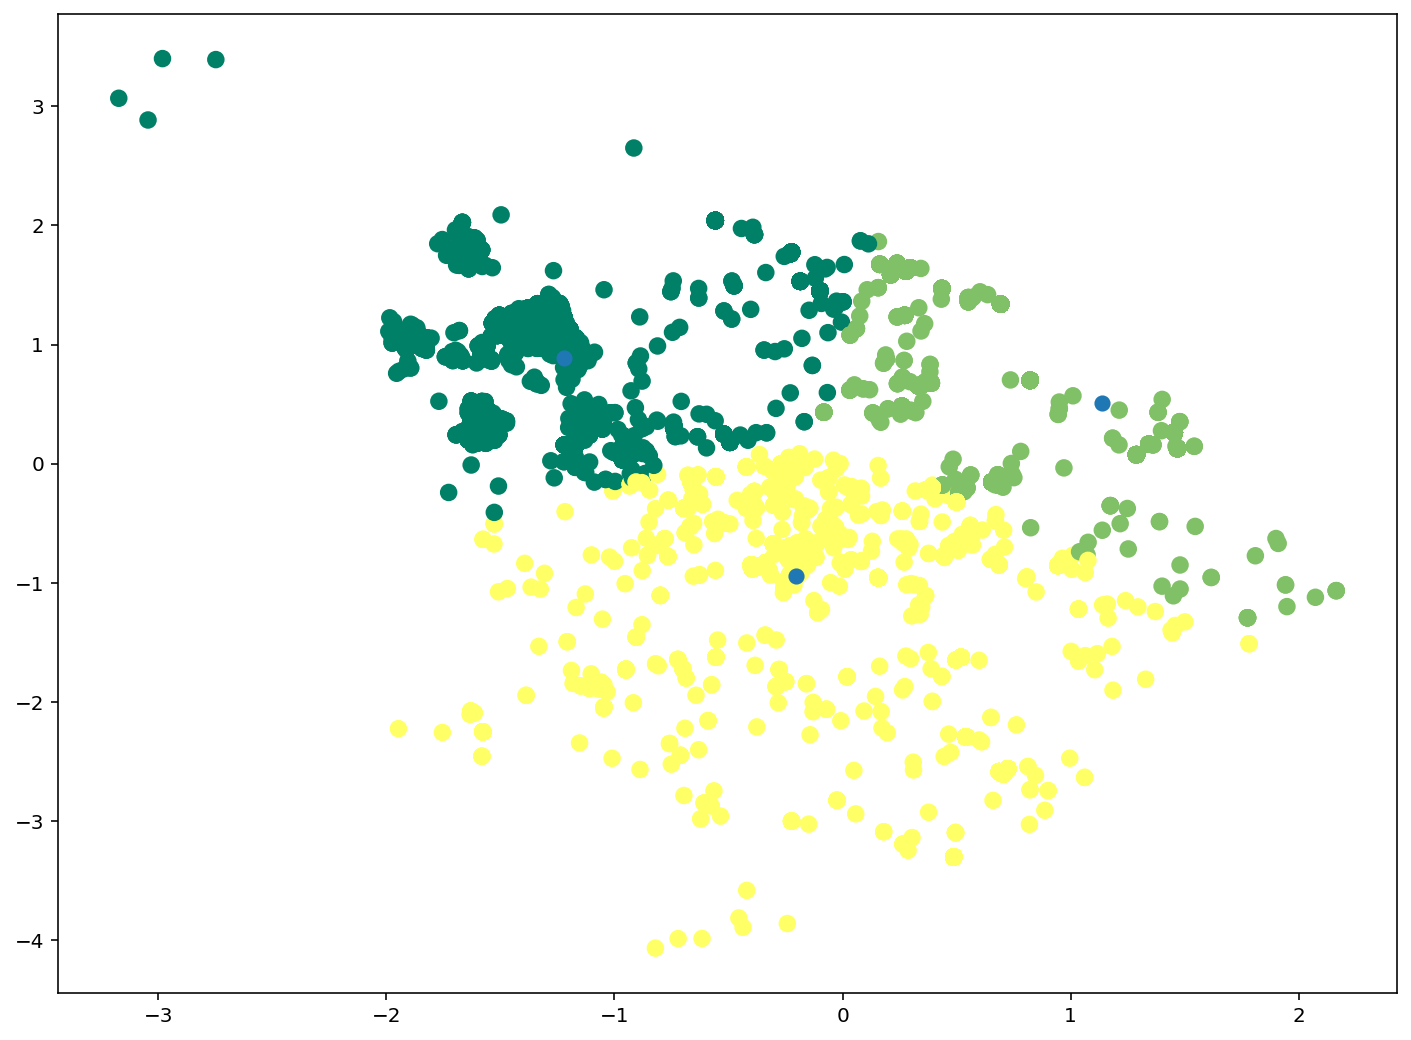

In [34]:
model_pos = KMeans(n_clusters=3)
clusters_pos = model_pos.fit_predict(X_positive)
centers_pos = model_pos.cluster_centers_
plt.scatter(X_positive[:, 0], X_positive[:, 1], c=clusters_pos, cmap='summer', s=60)
plt.scatter(centers_pos[:, 0], centers_pos[:, 1], s=50)

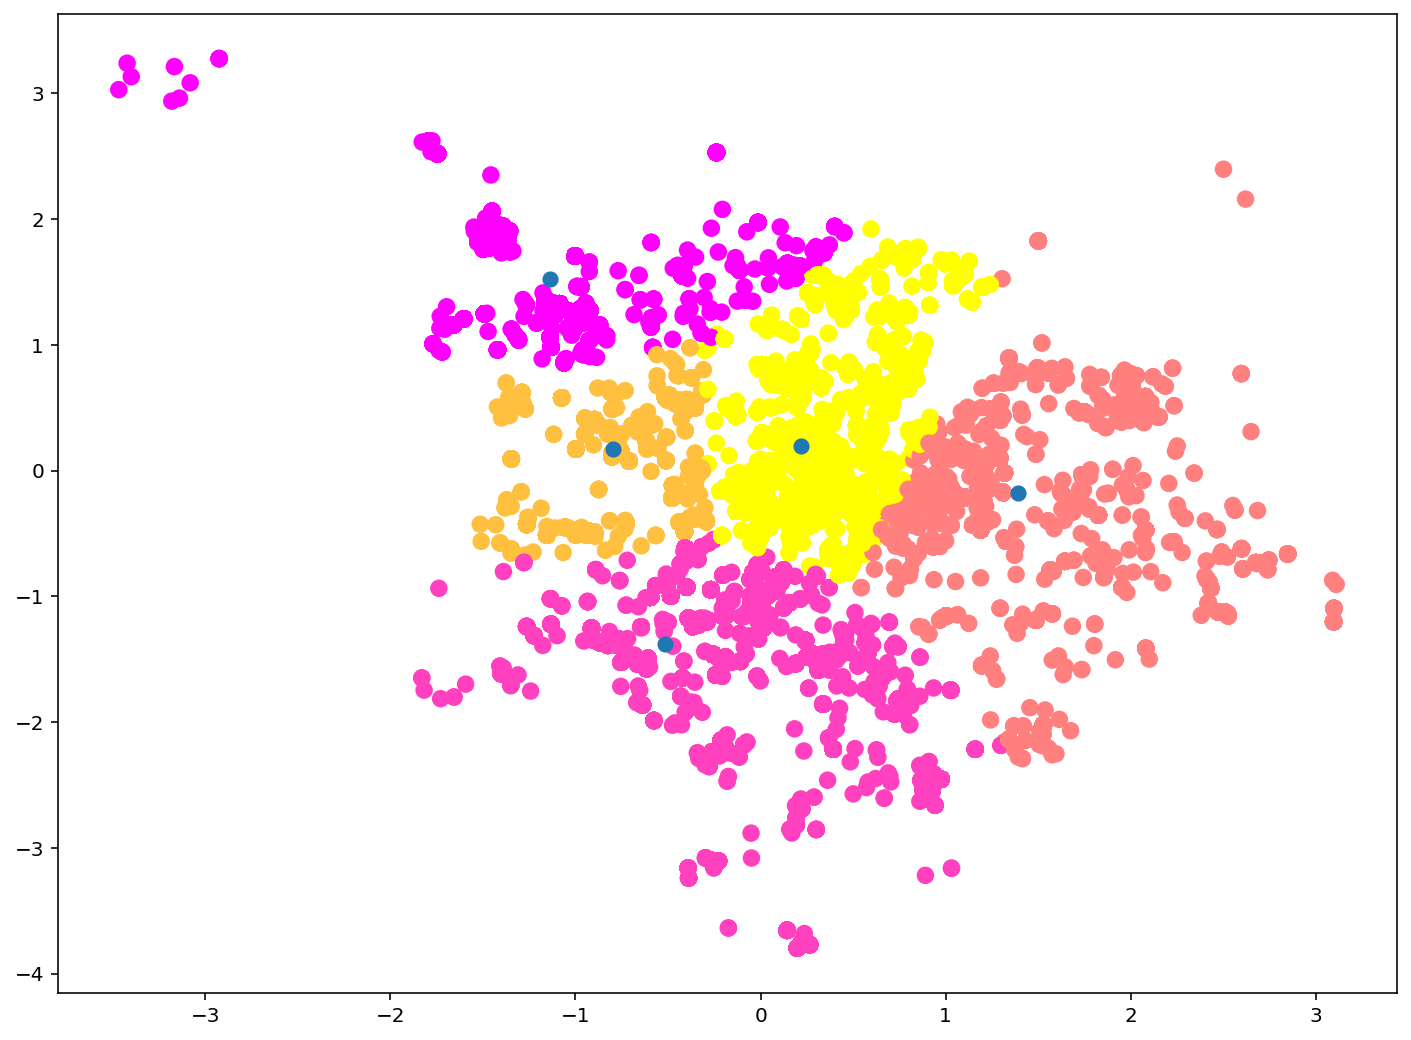

In [35]:
model_neg = KMeans(n_clusters=5)
clusters_neg = model_neg.fit_predict(X_negative)
centers_neg = model_neg.cluster_centers_
plt.scatter(X_negative[:, 0], X_negative[:, 1], c=clusters_neg, cmap='spring', s=60)
plt.scatter(centers_neg[:, 0], centers_neg[:, 1], s=50)